In [1]:
from imports import *

In [2]:
root_dir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies'
table = QTable.read('%s/data_hstha_nebulae_catalogue/all/nebulae_catalogue_wassociations.fits' %root_dir)

mask_hii = table['HII_class_v3_MUSE']==1
table = table[mask_hii]

mask = ~table['no_associations_association_nuv_32pc']
table = table[mask]

table['gal_name', 'region_ID', 'region_ID_association_nuv_32pc', 'age_association_nuv_32pc', 'mass_association_nuv_32pc']

gal_name,region_ID,region_ID_association_nuv_32pc,age_association_nuv_32pc,mass_association_nuv_32pc
bytes32,float64,float64,float64,float64
IC5332,10.0,341.0,4.0,1726.7728454843584
IC5332,17.0,500.0,2.0,4139.695819420994
IC5332,18.0,493.0,10.0,1353.906565077747
IC5332,21.0,491.0,8.0,1141.5279077297132
IC5332,26.0,171.0,1.0,11481.69079464005
IC5332,29.0,458.0,2.0,1349.3038103133133
IC5332,31.0,528.0,2.0,4279.84410449229
IC5332,38.0,123.0,1.0,2302.3488655771403
IC5332,41.0,422.0,3.0,723.3941293708432


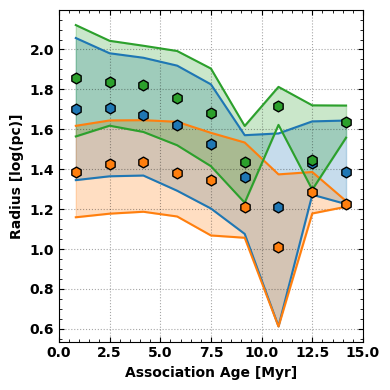

In [3]:
colors = mpl.cm.tab20(np.arange(0,20))
colors1 = colors[::2]
colors2 = colors[1::2]

mask_complex = table['complexity_score'] < 2

data_x1 = np.array(table['age_association_nuv_32pc'].value)
data_y1 = np.log10(table['radius_circ_pc'].value)

bins = np.linspace(-1, 15, 16)

fig = plt.figure(figsize=(4, 4)) 
ax = fig.add_subplot(111)

x, y, stats, bins = get_bins_1d(data_x1, data_y1, bins=np.linspace(0, 15, 10))
# ax.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1.5)
ax.plot(x, stats['-1sigma'], color='C0', lw=1.5, ls='-')
ax.plot(x, stats['+1sigma'], color='C0', lw=1.5, ls='-')
ax.fill_between(x, stats['-1sigma'], stats['+1sigma'], color='C0', alpha=0.25)
ax.scatter(x, y, s=60, ec='black', fc='C0', zorder=10, marker='h')

x, y, stats, bins = get_bins_1d(data_x1[mask_complex], data_y1[mask_complex], bins=np.linspace(0, 15, 10))
# ax.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1.5)
ax.plot(x, stats['-1sigma'], color='C1', lw=1.5, ls='-')
ax.plot(x, stats['+1sigma'], color='C1', lw=1.5, ls='-')
ax.fill_between(x, stats['-1sigma'], stats['+1sigma'], color='C1', alpha=0.25)
ax.scatter(x, y, s=60, ec='black', fc='C1', zorder=10, marker='h')

x, y, stats, bins = get_bins_1d(data_x1[~mask_complex], data_y1[~mask_complex], bins=np.linspace(0, 15, 10))
# ax.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1.5)
ax.plot(x, stats['-1sigma'], color='C2', lw=1.5, ls='-')
ax.plot(x, stats['+1sigma'], color='C2', lw=1.5, ls='-')
ax.fill_between(x, stats['-1sigma'], stats['+1sigma'], color='C2', alpha=0.25)
ax.scatter(x, y, s=60, ec='black', fc='C2', zorder=10, marker='h')

ax.grid(True, alpha=0.35, ls=':', color='black')

ax.set_ylabel('Radius [log(pc)]')
ax.set_xlabel('Association Age [Myr]')

# ax.set_xlim(xlim)
ax.set_xlim([0,15])

fig.tight_layout(h_pad=0.5, w_pad=0.5)

# plt.savefig('./figs/hist_associations_nuv_agelog_all.pdf', dpi=250, bbox_inches='tight')

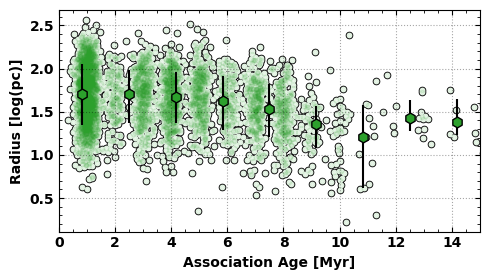

In [4]:
colors = mpl.cm.tab20(np.arange(0,20))
colors1 = colors[::2]
colors2 = colors[1::2]

data_x1 = np.array(table['age_association_nuv_32pc'].value)
data_y1 = np.log10(table['radius_circ_pc'].value)

bins = np.linspace(-1, 15, 20)

fig = plt.figure(figsize=(5, 2.9))
ax = fig.add_subplot(111)

data_x1_scatter = data_x1.copy()
data_x1_scatter += np.random.normal(0, 0.2, len(data_x1_scatter))

ax.scatter(data_x1_scatter, data_y1, s=20, c='black', rasterized=True)
ax.scatter(data_x1_scatter, data_y1, s=10, c='white', rasterized=True)
ax.scatter(data_x1_scatter, data_y1, s=10, alpha=0.1, rasterized=True, c='C2')

x, y, stats, bins = get_bins_1d(data_x1, data_y1, bins=np.linspace(0, 15, 10))
ax.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1.5)
ax.scatter(x, y, s=60, ec='black', fc='C2', zorder=10, marker='h')

ax.grid(True, alpha=0.35, ls=':', color='black')

ax.set_ylabel('Radius [log(pc)]')
ax.set_xlabel('Association Age [Myr]')

# ax.set_xlim(xlim)
ax.set_xlim([0,15])

fig.tight_layout(h_pad=0.5, w_pad=0.5)

plt.savefig('./figs/scatter_associations_nuv_32pc_agelog_rad_all.pdf', dpi=250, bbox_inches='tight')

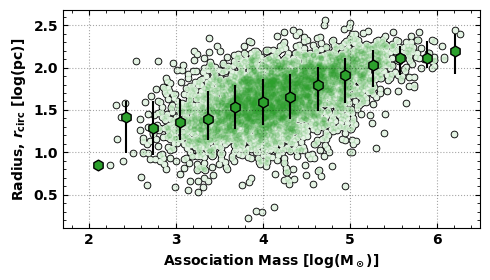

In [5]:
colors = mpl.cm.tab20(np.arange(0,20))
colors1 = colors[::2]
colors2 = colors[1::2]


data_x1 = np.array(np.log10(table['mass_association_v_32pc'].value))
data_y1 = np.log10(table['radius_circ_pc'].value)

bins = np.linspace(-1, 15, 16)

fig = plt.figure(figsize=(5, 2.9)) 
ax = fig.add_subplot(111)

ax.scatter(data_x1, data_y1, s=20, c='black', rasterized=True)
ax.scatter(data_x1, data_y1, s=10, c='white', rasterized=True)
ax.scatter(data_x1, data_y1, s=10, alpha=0.1, rasterized=True, c='C2')

x, y, stats, bins = get_bins_1d(data_x1, data_y1, bins=np.linspace(1, 7, 20))
ax.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1.5)
ax.scatter(x, y, s=60, ec='black', fc='C2', zorder=10, marker='h')

ax.grid(True, alpha=0.35, ls=':', color='black')

ax.set_ylabel('Radius, $r_\mathrm{circ}$ [log(pc)]')
ax.set_xlabel('Association Mass [log(M$_\odot$)]')

# ax.set_xlim(xlim)
ax.set_xlim([1.7, 6.5])

fig.tight_layout(h_pad=0.5, w_pad=0.5)

plt.savefig('./figs/scatter_associations_nuv_32pc_masslog_rad_all.pdf', dpi=250, bbox_inches='tight')

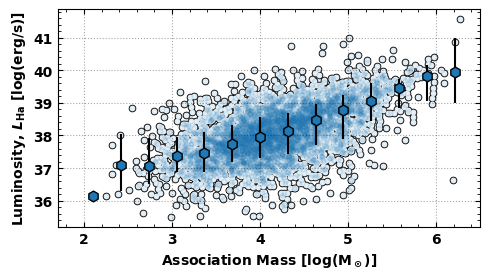

In [6]:
colors = mpl.cm.tab20(np.arange(0,20))
colors1 = colors[::2]
colors2 = colors[1::2]

data_x1 = np.array(np.log10(table['mass_association_v_32pc'].value))
data_y1 = np.log10(np.array(table['HA6562_LUMINOSITY_HST'].value))

bins = np.linspace(-1, 15, 16)

fig = plt.figure(figsize=(5, 2.9)) 
ax = fig.add_subplot(111)

ax.scatter(data_x1, data_y1, s=20, c='black', rasterized=True)
ax.scatter(data_x1, data_y1, s=10, c='white', rasterized=True)
ax.scatter(data_x1, data_y1, s=10, alpha=0.1, rasterized=True)

x, y, stats, bins = get_bins_1d(data_x1, data_y1, bins=np.linspace(1, 7, 20))
ax.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1.5)
ax.scatter(x, y, s=60, ec='black', fc='C0', zorder=10, marker='h')

ax.grid(True, alpha=0.35, ls=':', color='black')

ax.set_ylabel('Luminosity, $L_\mathrm{Ha}$ [log(erg/s)]')
ax.set_xlabel('Association Mass [log(M$_\odot$)]')

# ax.set_xlim(xlim)
ax.set_xlim([1.7, 6.5])

fig.tight_layout(h_pad=0.5, w_pad=0.5)

# plt.savefig('./figs/scatter_associations_nuv_32pc_masslog_rad_all.pdf', dpi=250, bbox_inches='tight')